## Fluvaccine imbalanced data on h1n1_vaccine

## Overview
Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

## About the data
The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS).

In their own words:

The National 2009 H1N1 Flu Survey (NHFS) was sponsored by the National Center for Immunization and Respiratory Diseases (NCIRD) and conducted jointly by NCIRD and the National Center for Health Statistics (NCHS), Centers for Disease Control and Prevention (CDC). The NHFS was a list-assisted random-digit-dialing telephone survey of households, designed to monitor influenza immunization coverage in the 2009-10 season.

The target population for the NHFS was all persons 6 months or older living in the United States at the time of the interview. Data from the NHFS were used to produce timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines.

## Problem Statement
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

## Target Variables
For this competition, there are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

## The features in this dataset
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

#### h1n1_concern - Level of concern about the H1N1 flu.0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
#### h1n1_knowledge - Level of knowledge about H1N1 flu.0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
#### behavioral_antiviral_meds - Has taken antiviral medications. (binary)
#### behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
#### behavioral_face_mask - Has bought a face mask. (binary)
#### behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
#### behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
#### behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
#### behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
#### doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
#### doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
#### chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
#### child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
#### health_worker - Is a healthcare worker. (binary)
#### health_insurance - Has health insurance. (binary)
#### opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
#### opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
#### opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
#### opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
#### opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
#### opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
#### age_group - Age group of respondent.
#### education - Self-reported education level.
#### race - Race of respondent.
#### sex - Sex of respondent.
#### income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
#### marital_status - Marital status of respondent.
#### rent_or_own - Housing situation of respondent.
#### employment_status - Employment status of respondent.
#### hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
#### census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
#### household_adults - Number of other adults in household, top-coded to 3.
#### household_children - Number of children in household, top-coded to 3.
#### employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
#### employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

## Performance metric
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. The mean of these two scores will be the overall score. A higher value indicates stronger performance.

### In this data i am working with H1N1 Vaccine which is imbalanced Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
import os

In [2]:
%cd "C:\Users\trish\OneDrive\Desktop\stats\capstone project"

C:\Users\trish\OneDrive\Desktop\stats\capstone project


In [3]:
flutrain=pd.read_csv("training_set_features.csv")

In [4]:
flutest=pd.read_csv("test_set_features.csv")

In [5]:
flulabel=pd.read_csv("training_set_labels.csv")

## Exploratory Data Analysis

In [6]:
flutrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
flutest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [8]:
flulabel.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


#### As there is duplicate column called repondent_id in all three datasets (train test and label) we will drop that column  from all of them


In [9]:
flutrain=flutrain.drop('respondent_id',axis=1)
flutest=flutest.drop('respondent_id',axis=1)
flulabel=flulabel.drop('respondent_id',axis=1)

In [10]:
flu=pd.concat([flutrain,flutest],axis=0)

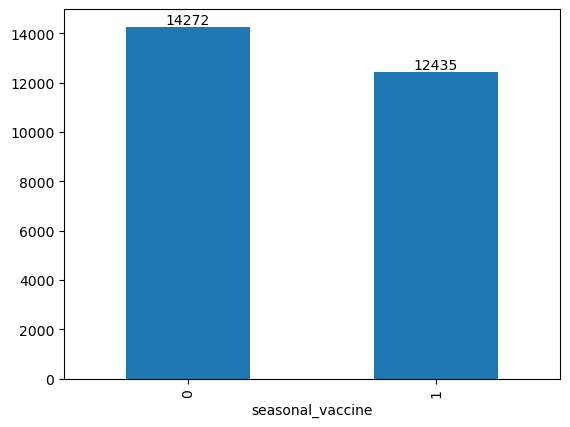

In [11]:
ax=flulabel.seasonal_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

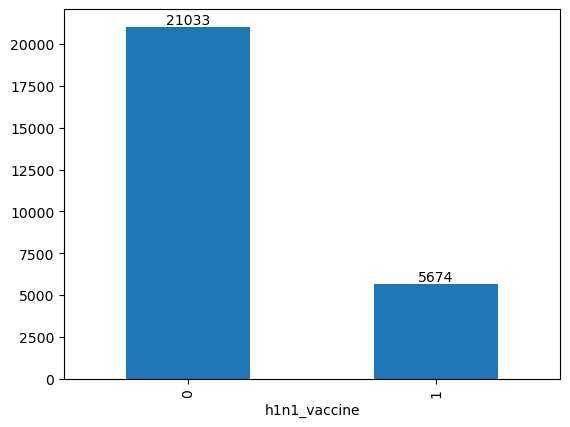

In [12]:
ax=flulabel.h1n1_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
# As there is imbalance in data we will work on this imbalance data

In [13]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 26707
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53238 non-null  float64
 1   h1n1_knowledge               53177 non-null  float64
 2   behavioral_antiviral_meds    53265 non-null  float64
 3   behavioral_avoidance         52994 non-null  float64
 4   behavioral_face_mask         53377 non-null  float64
 5   behavioral_wash_hands        53333 non-null  float64
 6   behavioral_large_gatherings  53256 non-null  float64
 7   behavioral_outside_home      53251 non-null  float64
 8   behavioral_touch_face        53159 non-null  float64
 9   doctor_recc_h1n1             49095 non-null  float64
 10  doctor_recc_seasonal         49095 non-null  float64
 11  chronic_med_condition        51512 non-null  float64
 12  child_under_6_months         51782 non-null  float64
 13  health_worker        

### As we have so many missing values in the data instead of doing manual imputation we will use MICE method to impute the data

In [14]:
#from sklearn.preprocessing import LabelEncoder

In [15]:
#original=flu
# we will assing whole data in original variable

In [16]:
#mask=flu.isnull()
# we will assign all nulls in this mask variable

In [17]:
#mask.head()

In [18]:
#flu=flu.astype(str).apply(LabelEncoder().fit_transform)# we have converted everycolumn to string and label encoded 

In [19]:
#flu=flu.where(~mask,original)# as we have label endoded in the previous step now we need to make null values as nan in this step

In [20]:
#flu.head()

In [21]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.tree import DecisionTreeClassifier
# imported all these for imputing the data

In [22]:
#imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        #initial_strategy='most_frequent',
                        #max_iter=50)
# Imputing the data using Iterative imputer

In [23]:
#flu_impute=imputer.fit_transform(flu) # Process of imputing may take a little late 

In [24]:
#flu_impute

In [25]:
#flu_impute=pd.DataFrame(flu_impute,columns=flu.columns) # Changing the array format to DataFrame

In [26]:
#flu_impute.info() # Here we can se all the values are imputed and there are no null values

In [27]:
#flu_impute.to_csv('h1n1_impute') # We save this file for future use  
# as the process may take long time to impute the missing values 

### After doing the above mentioned process i have saved that file to csv and used it for model

In [28]:
flu_impute=pd.read_csv("h1n1_impute")

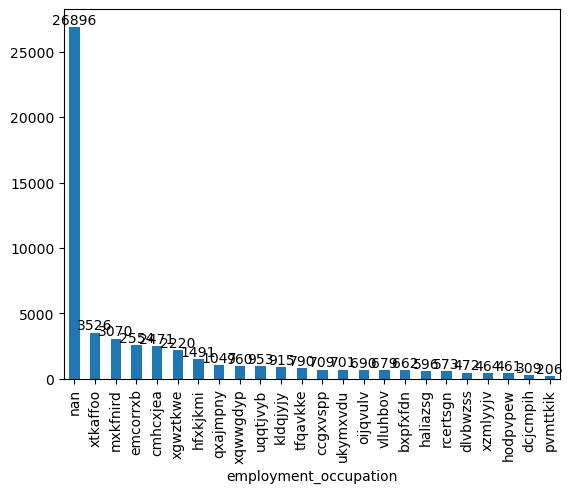

In [29]:
ax=flu.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
# before mice imputation we can see there are null values    

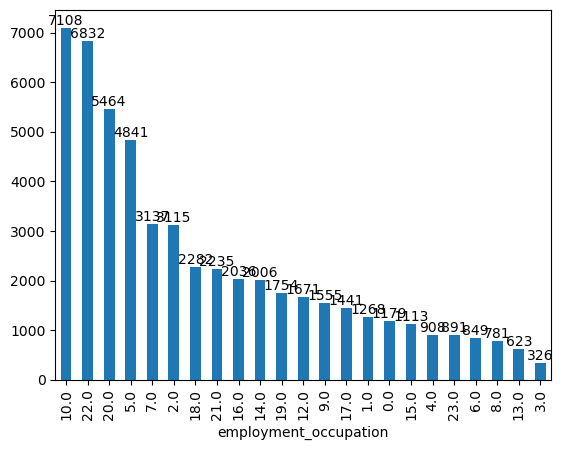

In [30]:
ax=flu_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
# After imputing mice we can see all the values are imputed and there are no null values    

In [31]:
flu_impute
# As the data all well mannered no need to do scalling for the data

,Unnamed: 0,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,13.0,20.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,13.0,20.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,19.0,5.0
53411,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,0.0,9.0,2.0,1.0,3.0,4.0,19.0
53412,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,8.0,7.0
53413,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,10.0


In [32]:
flu_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   53415 non-null  int64  
 1   h1n1_concern                 53415 non-null  float64
 2   h1n1_knowledge               53415 non-null  float64
 3   behavioral_antiviral_meds    53415 non-null  float64
 4   behavioral_avoidance         53415 non-null  float64
 5   behavioral_face_mask         53415 non-null  float64
 6   behavioral_wash_hands        53415 non-null  float64
 7   behavioral_large_gatherings  53415 non-null  float64
 8   behavioral_outside_home      53415 non-null  float64
 9   behavioral_touch_face        53415 non-null  float64
 10  doctor_recc_h1n1             53415 non-null  float64
 11  doctor_recc_seasonal         53415 non-null  float64
 12  chronic_med_condition        53415 non-null  float64
 13  child_under_6_mo

#### Split the data bak to train and test 

In [33]:
trainflu=flu_impute.loc[0:26706]
testflu=flu_impute.loc[26707:53414]
# we will split the data using loc index

In [34]:
trainflu

,Unnamed: 0,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,13.0,20.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,13.0,20.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,9.0,2.0,0.0,0.0,4.0,6.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,4.0,2.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,19.0,22.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,5.0,2.0,1.0,0.0,4.0,6.0


In [35]:
testflu

,Unnamed: 0,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26707,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,1.0,7.0
26708,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,1.0,21.0
26709,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,5.0,2.0,1.0,0.0,11.0,13.0
26710,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,20.0,9.0
26711,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,6.0,2.0,0.0,1.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,19.0,5.0
53411,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,0.0,9.0,2.0,1.0,3.0,4.0,19.0
53412,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,8.0,7.0
53413,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,10.0


In [36]:
trainflu=trainflu.drop('Unnamed: 0',axis=1)
testflu=testflu.drop('Unnamed: 0',axis=1)

In [37]:
print(trainflu.shape)
print(testflu.shape)

(26707, 35)
(26708, 35)


### Data Visualization

<Axes: ylabel='count'>

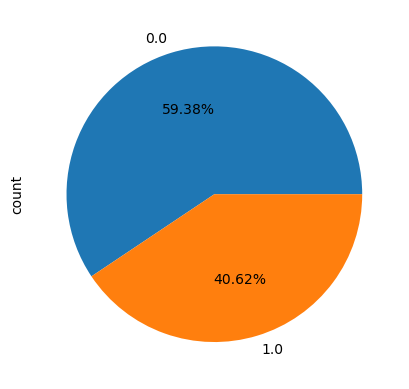

In [38]:
# Pie Diagrams - sex,
trainflu.sex.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

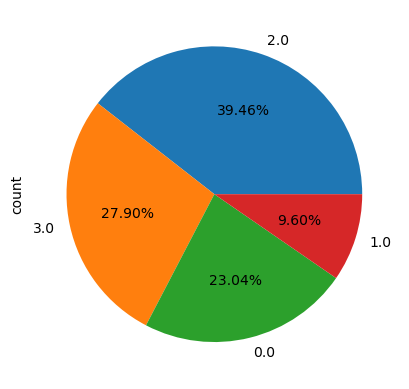

In [39]:
# Pie Diagrams - education
trainflu.education.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

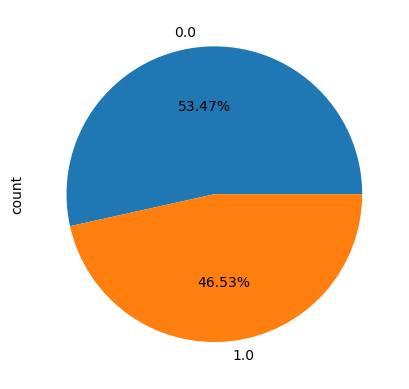

In [40]:
# Pie Diagrams - marital_status
trainflu.marital_status.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

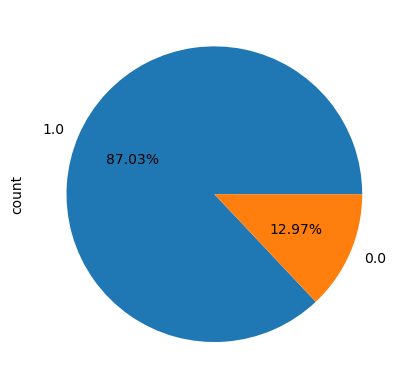

In [41]:
# Pie Diagrams - health_insurance
trainflu.health_insurance.value_counts().plot(kind='pie',autopct='%0.2f%%')

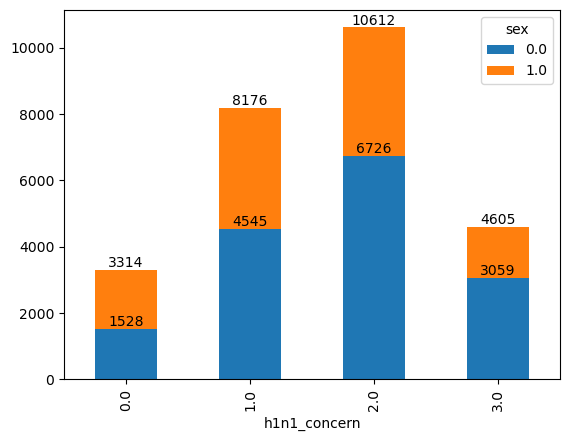

In [42]:
# Stacked Bar Plots - h1n1_concern & sex 
ax=pd.crosstab(trainflu.h1n1_concern,trainflu.sex).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)    

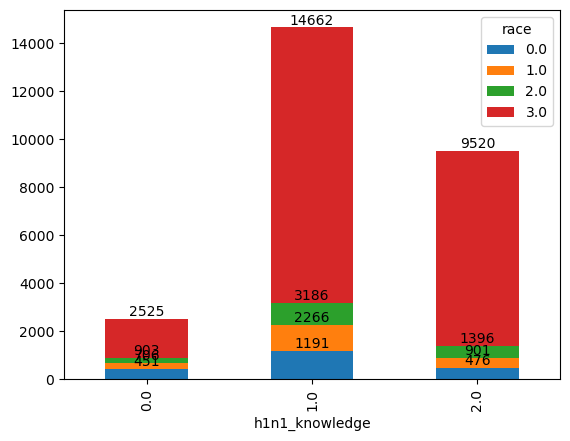

In [43]:
# Stacked Bar Plots - h1n1_knowledge & race
ax=pd.crosstab(trainflu.h1n1_knowledge,trainflu.race).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

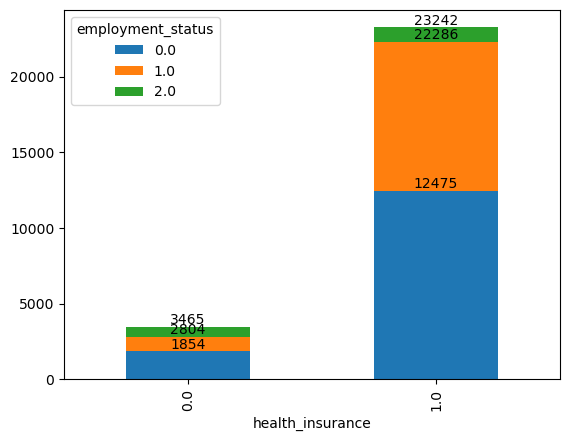

In [44]:
# Stacked Bar Plots - health_insurance & employment_status,
ax=pd.crosstab(trainflu.health_insurance,trainflu.employment_status).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

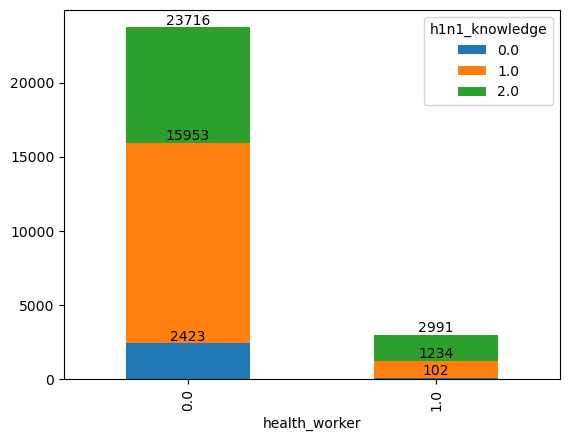

In [45]:
# stacked barplot - health_worker & h1n1knowledge
ax=pd.crosstab(trainflu.health_worker,trainflu.h1n1_knowledge).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

### Hypothesis Testing

In [46]:
from scipy.stats import chi2_contingency

#### Test Null No Association between h1n1_vaccine & h1n1concern

In [47]:
pd.crosstab(flulabel.h1n1_vaccine,trainflu.h1n1_concern)
# since pvalue=3.075121463735956e-143 is lessthan 0.05 both are independent reject null

h1n1_concern,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,2864,6777,8130,3262
1,450,1399,2482,1343


In [48]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,trainflu.h1n1_concern))
#Null:There is no significante difference between h1n1_vaccine for different h1n1_concern

Chi2ContingencyResult(statistic=401.65256861142495, pvalue=9.709469467411686e-87, dof=3, expected_freq=array([[2609.92855806, 6438.9788445 , 8357.4417194 , 3626.65087805],
       [ 704.07144194, 1737.0211555 , 2254.5582806 ,  978.34912195]]))

#### Test Null No Association between h1n1_vaccine & h1n1knowledge

In [49]:
pd.crosstab(flulabel.h1n1_vaccine,trainflu.h1n1_knowledge)
# since pvalue=3.350706141408485e-86 is lessthan 0.05 both are independent reject null

h1n1_knowledge,0.0,1.0,2.0
h1n1_vaccine,,,
0,2162,11997,6874
1,363,2665,2646


In [50]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,trainflu.h1n1_knowledge))
#Null:There is no significante difference between h1n1_vaccine for different h1n1_knowledge


Chi2ContingencyResult(statistic=397.7641555078144, pvalue=4.232637565044274e-87, dof=2, expected_freq=array([[ 1988.55449882, 11547.00438087,  7497.44112031],
       [  536.44550118,  3114.99561913,  2022.55887969]]))

#### Test Null No Association between h1n1_vaccine & health_worker

In [51]:
pd.crosstab(flulabel.h1n1_vaccine,trainflu.health_worker)
# since pvalue=1.0854198362462328e-90 is lessthan 0.05 both are independent reject Null

health_worker,0.0,1.0
h1n1_vaccine,,
0,19251,1782
1,4465,1209


In [52]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,trainflu.health_worker))
#Null:There is no significante difference between h1n1_vaccine different health_worker

Chi2ContingencyResult(statistic=738.9475258562708, pvalue=1.0153857611886175e-162, dof=1, expected_freq=array([[18677.44890853,  2355.55109147],
       [ 5038.55109147,   635.44890853]]))

#### Test Null No Association between h1n1_vaccine & sex

In [53]:
pd.crosstab(flulabel.h1n1_vaccine,trainflu.sex)
# since  pvalue=0.0007709155489949327, is lessthan 0.05 both are independent so reject null

sex,0.0,1.0
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [54]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,flutrain.sex))
#Null:There is no significante difference between h1n1_vaccine for different sex

Chi2ContingencyResult(statistic=11.309981152455997, pvalue=0.0007709155489949327, dof=1, expected_freq=array([[12488.90979893,  8544.09020107],
       [ 3369.09020107,  2304.90979893]]))

#### Test Null No Association between h1n1_vaccine & employment_status

In [55]:
pd.crosstab(flulabel.h1n1_vaccine,flutrain.employment_status)
# since  pvalue=5.472123171178154e-06 is lessthan 0.05 both are independent so reject null

employment_status,Employed,Not in Labor Force,Unemployed
h1n1_vaccine,,,
0,10637,7988,1216
1,2923,2243,237


In [56]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,flutrain.employment_status))
#Null:There is no significante difference between h1n1_vaccine for different employment_status

Chi2ContingencyResult(statistic=24.231687737089246, pvalue=5.472123171178154e-06, dof=2, expected_freq=array([[10657.73886864,  8041.24825701,  1142.01287435],
       [ 2902.26113136,  2189.75174299,   310.98712565]]))

#### Test Null No Association between h1n1_vaccine & education

In [223]:
pd.crosstab(flulabel.h1n1_vaccine,flutrain.education)
# since pvalue=1.7064066491282076e-26 is lessthan 0.05 both are independent so reject null 

education,12 Years,< 12 Years,College Graduate,Some College
h1n1_vaccine,,,,
0,4726,1968,7614,5579
1,1071,395,2483,1464


In [58]:
chi2_contingency(pd.crosstab(flulabel.h1n1_vaccine,flutrain.education))
#Null:There is no significante difference between  h1n1_vaccine for different education

Chi2ContingencyResult(statistic=123.04265449793024, pvalue=1.7064066491282076e-26, dof=3, expected_freq=array([[4556.71695652, 1857.43007905, 7936.72090909, 5536.13205534],
       [1240.28304348,  505.56992095, 2160.27909091, 1506.86794466]]))

## After doing EDA we will start model building

### We will split the data into x and y

In [59]:
x=trainflu
y=flulabel.h1n1_vaccine.values

In [60]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
y=LabelEncoder().fit_transform(y)

<Figure size 1500x3000 with 0 Axes>

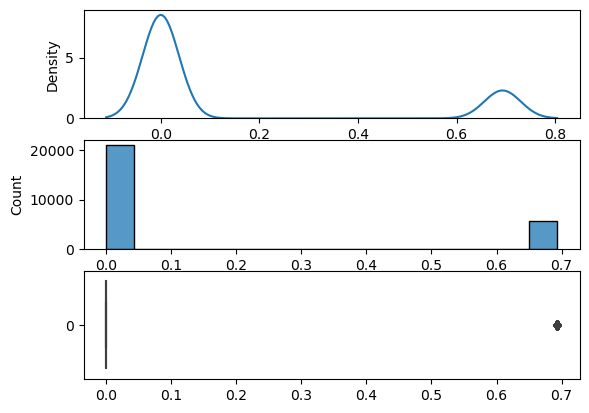

In [63]:
plt.figure(figsize=(15,30))
fig, ax=plt.subplots(3,1)
sns.kdeplot(np.log1p(y),ax=ax[0])
sns.histplot(np.log1p(y),ax=ax[1])
sns.boxplot(np.log1p(y),orient='h',ax=ax[2])
plt.show()

## LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logit=LogisticRegression(max_iter=300)

In [66]:
#logit_params={'max_iter':[100,200,300,500,800,1000,1400,1600,1900,2100,2500,3000]}

#from sklearn.model_selection import GridSearchCV

#logit_grid=GridSearchCV(estimator=LogisticRegression(),param_grid=logit_params).fit(x,y)

#logit_grid.best_estimator_

#logit_grid.best_score_

In [67]:
#logit_grid.best_estimator_

In [68]:
#logit_grid.best_score_

In [69]:
logitmodel=logit.fit(x,y)

In [70]:
logitmodel.score(x,y)

0.8316171790167372

In [71]:
logitpredict=logitmodel.predict(x)

In [72]:
logitpredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [74]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,19937,1096
1,3401,2273


In [75]:
print(classification_report(y,logitpredict))
# Here we can see there is a lot of difference in 0&1 in precision recall and f1-score
# So there is imbalnce in this data 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.82      0.83      0.81     26707



In [76]:
cross_val_score(logit,x,y)

array([0.82796705, 0.82684388, 0.83411346, 0.83579854, 0.82793484])

In [77]:
np.mean([0.82796705, 0.82684388, 0.83411346, 0.83579854, 0.82793484])

0.830531554

## To treat with imbalance data we need to install imblearn

In [78]:
!pip install imblearn

In [79]:
from imblearn.over_sampling import SMOTEN

In [80]:
smote=SMOTEN(random_state=42)

In [81]:
x_smote,y_smote=smote.fit_resample(x,y)

In [82]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())
# Here we can see the difference between smote and without smote

0    21033
1     5674
Name: count, dtype: int64
0    21033
1    21033
Name: count, dtype: int64


## Logistic Regression with smote

In [83]:
logit_smote_model=logit.fit(x_smote,y_smote)

In [84]:
logit_smote_model.score(x_smote,y_smote)

0.8105595968240384

In [85]:
cross_val_score(logit_smote_model,x_smote,y_smote)

array([0.67613501, 0.79222632, 0.8377511 , 0.84737906, 0.84464519])

In [86]:
np.mean([0.67613501, 0.79222632, 0.8377511 , 0.84737906, 0.84464519])

0.7996273359999999

In [87]:
logit_smote_predict=logit_smote_model.predict(x_smote)

In [88]:
pd.crosstab(y_smote,logit_smote_predict)

col_0,0,1
row_0,,
0,17237,3796
1,4173,16860


In [89]:
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



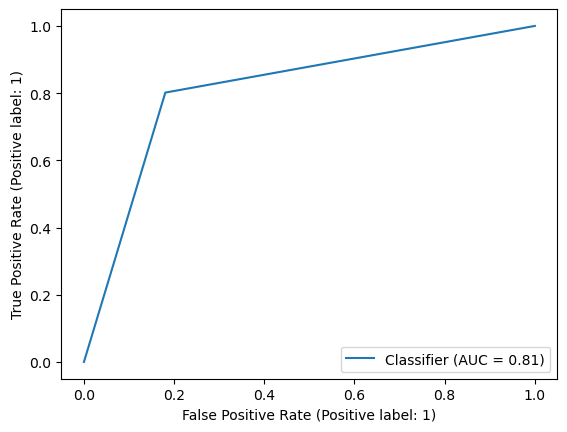

In [90]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_predict)

In [91]:
test_logit=logit_smote_model.predict_proba(testflu)

In [92]:
pd.DataFrame(test_logit).to_csv('logit2_h1n1.csv')

## Decision Tree without smote

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
#tree_params={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
#tree_grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_params, cv=5).fit(x,y)

#tree_grid.best_estimator_

#tree_grid.best_score_

In [95]:
#tree_grid.best_estimator_

In [96]:
#tree_grid.best_score_

In [97]:
#tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [215]:
tree=DecisionTreeClassifier(max_depth=6)

In [216]:
treemodel=tree.fit(x,y)

In [217]:
treemodel.score(x,y)

0.8315422922829221

In [218]:
cross_val_score(tree,x,y)

array([0.82646949, 0.81898165, 0.82437746, 0.82737315, 0.82138176])

In [219]:
np.mean([0.82646949, 0.81898165, 0.82437746, 0.82737315, 0.82138176])

0.8237167020000001

In [220]:
treepredict=treemodel.predict(x)

In [221]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,19910,1123
1,3376,2298


In [222]:
print(classification_report(y,treepredict))
# As we see there is imbalance

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21033
           1       0.67      0.41      0.51      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.68      0.70     26707
weighted avg       0.82      0.83      0.81     26707



## Decision Tree with smote

In [106]:
tree_smote_model=tree.fit(x_smote,y_smote)

In [107]:
tree_smote_model.score(x_smote,y_smote)

1.0

In [108]:
cross_val_score(tree_smote_model,x_smote,y_smote)

array([0.6276444 , 0.79935814, 0.86936883, 0.87578747, 0.86568406])

In [109]:
np.mean([0.68576183, 0.75811245, 0.78271722, 0.79175086, 0.78366813])

0.760402098

In [110]:
tree_smote_predict=tree_smote_model.predict(x_smote)

In [111]:
pd.crosstab(y_smote,tree_smote_predict)

col_0,0,1
row_0,,
0,21033,0
1,0,21033


In [112]:
print(classification_report(y_smote,tree_smote_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00     21033

    accuracy                           1.00     42066
   macro avg       1.00      1.00      1.00     42066
weighted avg       1.00      1.00      1.00     42066



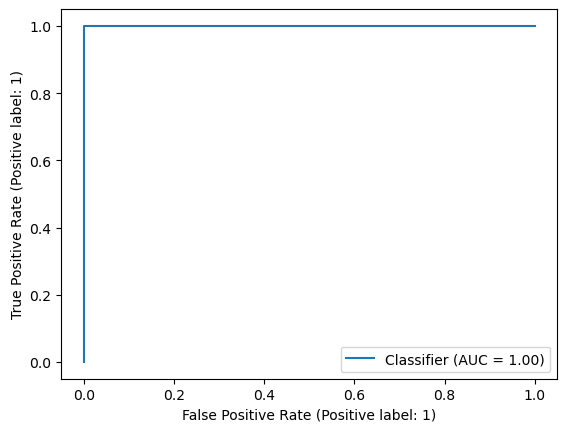

In [113]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_predict)

In [114]:
test_tree=tree_smote_model.predict_proba(testflu)

In [115]:
pd.DataFrame(test_tree).to_csv('tree_h1n1.csv')

## RandomForest without smote

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
estimator=RandomForestClassifier()
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=6)

In [119]:
rfmodel=rf.fit(x,y)

In [120]:
rfmodel.score(x,y)

0.8249148163402853

In [121]:
cross_val_score(rf,x,y)

array([0.82029203, 0.81954324, 0.82325407, 0.82287961, 0.82063284])

In [122]:
np.mean([0.81954324, 0.82029203, 0.8234413 , 0.82175623, 0.82063284])

0.8211331279999999

In [123]:
rfpredict=rfmodel.predict(x)

In [124]:
pd.crosstab(y,rfpredict)

col_0,0,1
row_0,,
0,20574,459
1,4217,1457


In [125]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21033
           1       0.76      0.26      0.38      5674

    accuracy                           0.82     26707
   macro avg       0.80      0.62      0.64     26707
weighted avg       0.82      0.82      0.79     26707



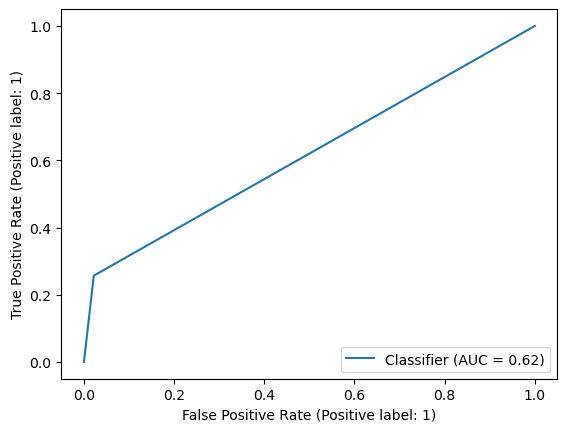

In [126]:
RocCurveDisplay.from_predictions(y,rfpredict)

## RandomForest with smote

In [127]:
rf_smote_model=rf.fit(x_smote,y_smote)

In [128]:
rf_smote_model.score(x_smote,y_smote)

0.8108924071696857

In [129]:
cross_val_score(rf_smote_model,x_smote,y_smote)

array([0.70976943, 0.79186973, 0.81754428, 0.83157019, 0.8272911 ])

In [130]:
np.mean([0.71083908, 0.78937359, 0.81885178, 0.83157019, 0.82847973])

0.795822874

In [131]:
rf_smote_predict=rf_smote_model.predict(x_smote)

In [132]:
pd.crosstab(y_smote,rf_smote_predict)

col_0,0,1
row_0,,
0,17570,3463
1,4492,16541


In [133]:
print(classification_report(y_smote,rf_smote_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     21033
           1       0.83      0.79      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



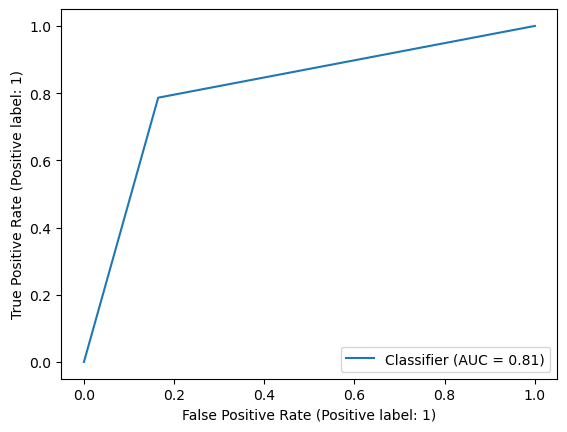

In [134]:
RocCurveDisplay.from_predictions(y_smote,rf_smote_predict)

In [135]:
test_rf=rf_smote_model.predict_proba(testflu)

In [136]:
pd.DataFrame(test_rf).to_csv('rf_h1n1.csv')

## GradientBoosting Classifier with smote

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
gb=GradientBoostingClassifier(n_estimators=1000,max_depth=3)

In [139]:
gbmodel=gb.fit(x,y)

In [140]:
gbmodel.score(x,y)

0.8624330699816527

In [141]:
cross_val_score(gb,x,y)

array([0.8347061 , 0.82983901, 0.836173  , 0.83729639, 0.82868377])

In [142]:
np.mean([0.8347061 , 0.82983901, 0.836173  , 0.83729639, 0.82868377])

0.8333396540000001

In [143]:
gbpredict=gbmodel.predict(x)

In [144]:
pd.crosstab(y,gbpredict)

col_0,0,1
row_0,,
0,20104,929
1,2745,2929


In [145]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21033
           1       0.76      0.52      0.61      5674

    accuracy                           0.86     26707
   macro avg       0.82      0.74      0.77     26707
weighted avg       0.85      0.86      0.85     26707



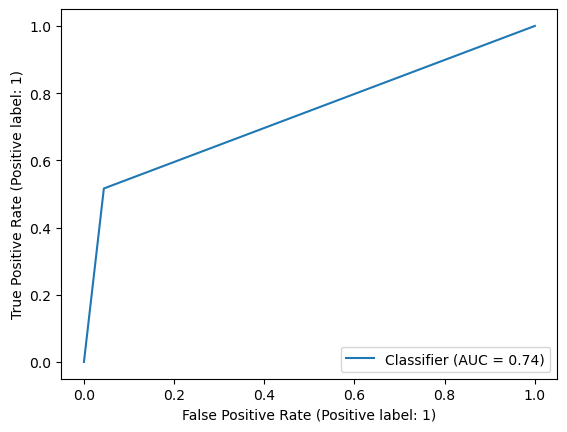

In [146]:
RocCurveDisplay.from_predictions(y,gbpredict)

## GradientBoosting Classifier with smote

In [147]:
gb_smote_model=gb.fit(x_smote,y_smote)

In [148]:
gb_smote_model.score(x_smote,y_smote)

0.8707031807160177

In [149]:
cross_val_score(gb_smote_model,x_smote,y_smote)

array([0.66888519, 0.8312136 , 0.89230952, 0.89349816, 0.89837157])

In [150]:
np.mean([0.66888519, 0.8312136 , 0.89230952, 0.89349816, 0.89837157])

0.8368556079999999

In [151]:
gb_smote_predict=gb_smote_model.predict(x_smote)

In [152]:
pd.crosstab(y_smote,gb_smote_predict)

col_0,0,1
row_0,,
0,18434,2599
1,2840,18193


In [153]:
print(classification_report(y_smote,gb_smote_predict))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     21033
           1       0.88      0.86      0.87     21033

    accuracy                           0.87     42066
   macro avg       0.87      0.87      0.87     42066
weighted avg       0.87      0.87      0.87     42066



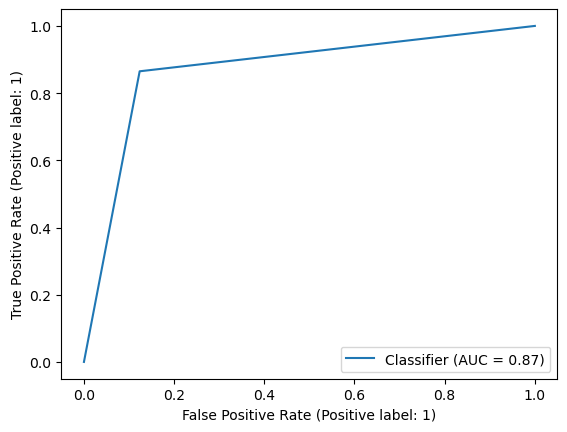

In [154]:
RocCurveDisplay.from_predictions(y_smote,gb_smote_predict)

In [155]:
test_gb=gb_smote_model.predict_proba(testflu)

In [156]:
pd.DataFrame(test_gb).to_csv('gb_h1n1.csv')

## SVC without smote

In [157]:
from sklearn.svm import SVC

In [158]:
svc=SVC(C=5)

In [159]:
svcmodel=svc.fit(x,y)

In [160]:
svcmodel.score(x,y)

0.8331898004268544

In [161]:
cross_val_score(svc,x,y)

array([0.8259079 , 0.82759266, 0.82868377, 0.82849654, 0.82868377])

In [162]:
np.mean([0.8259079 , 0.82759266, 0.82868377, 0.82849654, 0.82868377])

0.827872928

In [163]:
svcpredict=svc.predict(x)

In [164]:
pd.crosstab(y,svcpredict)

col_0,0,1
row_0,,
0,20267,766
1,3689,1985


In [165]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21033
           1       0.72      0.35      0.47      5674

    accuracy                           0.83     26707
   macro avg       0.78      0.66      0.69     26707
weighted avg       0.82      0.83      0.81     26707



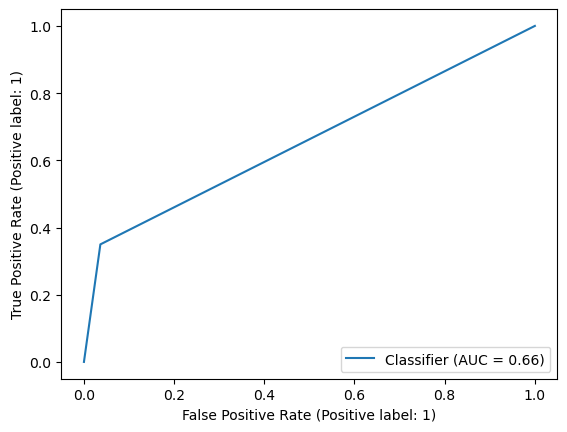

In [166]:
RocCurveDisplay.from_predictions(y,svcpredict)

## SVC with smote

In [167]:
svc_smote_model=svc.fit(x_smote,y_smote)

In [168]:
svc_smote_model.score(x_smote,y_smote)

0.8341178148623591

In [169]:
cross_val_score(svc_smote_model,x_smote,y_smote)

array([0.67649156, 0.81017473, 0.85629383, 0.86378224, 0.86651611])

In [170]:
np.mean([0.67649156, 0.81017473, 0.85629383, 0.86378224, 0.86651611])

0.8146516939999999

In [171]:
svc_smote_predict=svc_smote_model.predict(x_smote)

In [172]:
pd.crosstab(y_smote,svc_smote_predict)

col_0,0,1
row_0,,
0,17871,3162
1,3816,17217


In [173]:
print(classification_report(y_smote,svc_smote_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     21033
           1       0.84      0.82      0.83     21033

    accuracy                           0.83     42066
   macro avg       0.83      0.83      0.83     42066
weighted avg       0.83      0.83      0.83     42066



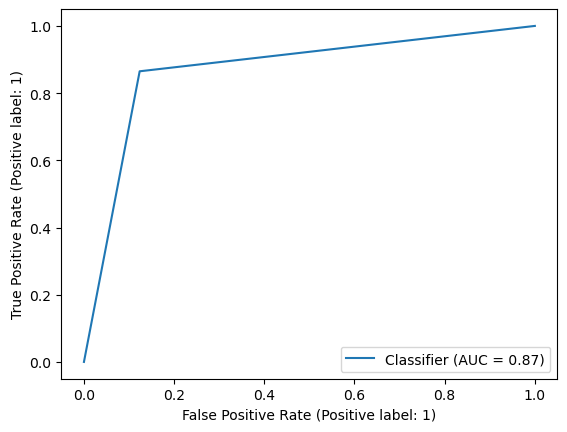

In [174]:
RocCurveDisplay.from_predictions(y_smote,gb_smote_predict)

## KNN without smote

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knc=KNeighborsClassifier(n_neighbors=3)

In [177]:
kncmodel=knc.fit(x,y)

In [178]:
kncmodel.score(x,y)

0.8680121316508781

In [179]:
cross_val_score(knc,x,y)

array([0.77761138, 0.77012355, 0.78262498, 0.78468452, 0.77588467])

In [180]:
np.mean([0.77761138, 0.77012355, 0.78262498, 0.78468452, 0.77588467])

0.7781858199999999

In [181]:
kncpredict=kncmodel.predict(x)

In [182]:
pd.crosstab(y,kncpredict)

col_0,0,1
row_0,,
0,20126,907
1,2618,3056


In [183]:
print(classification_report(y,kncpredict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21033
           1       0.77      0.54      0.63      5674

    accuracy                           0.87     26707
   macro avg       0.83      0.75      0.78     26707
weighted avg       0.86      0.87      0.86     26707



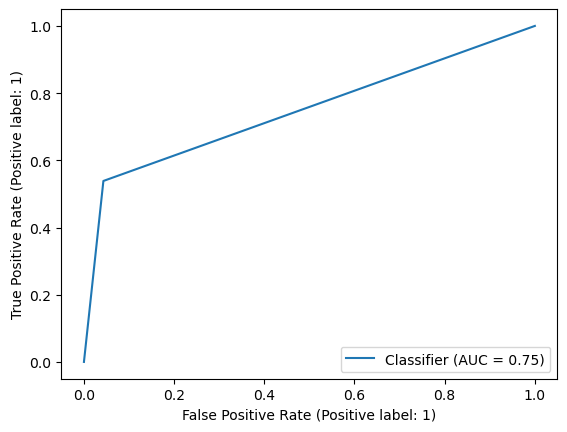

In [184]:
RocCurveDisplay.from_predictions(y,kncpredict)

## KNN with smote

In [186]:
knc_smote_model=knc.fit(x_smote,y_smote)

In [187]:
knc_smote_model.score(x_smote,y_smote)

0.8931916512147577

In [188]:
cross_val_score(knc_smote_model,x_smote,y_smote)

array([0.65771333, 0.78390586, 0.85094497, 0.85189588, 0.85070724])

In [189]:
np.mean([0.65771333, 0.78390586, 0.85094497, 0.85189588, 0.85070724])

0.7990334560000001

In [190]:
knc_smote_predict=knc_smote_model.predict(x_smote)

In [191]:
pd.crosstab(y_smote,knc_smote_predict)

col_0,0,1
row_0,,
0,18346,2687
1,1806,19227


In [192]:
print(classification_report(y_smote,knc_smote_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     21033
           1       0.88      0.91      0.90     21033

    accuracy                           0.89     42066
   macro avg       0.89      0.89      0.89     42066
weighted avg       0.89      0.89      0.89     42066



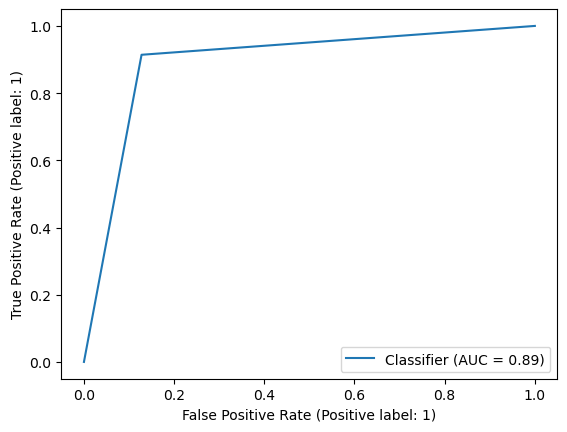

In [193]:
RocCurveDisplay.from_predictions(y_smote,knc_smote_predict)

## GaussionNB without smote

In [194]:
from sklearn.naive_bayes import GaussianNB

In [195]:
gn=GaussianNB()

In [196]:
gnmodel=gn.fit(x,y)

In [197]:
gnmodel.score(x,y)

0.7654921930579998

In [198]:
gnpredict=gnmodel.predict(x)

In [199]:
pd.crosstab(y,gnpredict)

col_0,0,1
row_0,,
0,16928,4105
1,2158,3516


In [200]:
cross_val_score(gn,x,y)

array([0.76731561, 0.76113815, 0.77101666, 0.76146789, 0.76502528])

In [201]:
np.mean([0.76731561, 0.76113815, 0.77101666, 0.76146789, 0.76502528])

0.765192718

In [202]:
print(classification_report(y,gnpredict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     21033
           1       0.46      0.62      0.53      5674

    accuracy                           0.77     26707
   macro avg       0.67      0.71      0.69     26707
weighted avg       0.80      0.77      0.78     26707



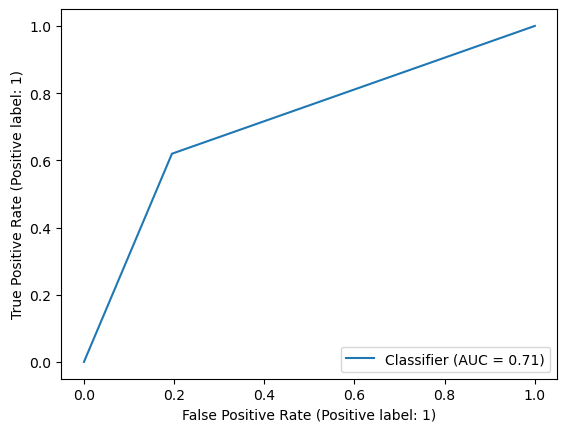

In [203]:
RocCurveDisplay.from_predictions(y,gnpredict)

## GaussionNB with smote

In [204]:
gn_smote_model=gn.fit(x_smote,y_smote)

In [205]:
gn_smote_model.score(x_smote,y_smote)

0.7577616127038463

In [206]:
cross_val_score(gn_smote_model,x_smote,y_smote)

array([0.62039458, 0.7412338 , 0.79721859, 0.79709973, 0.79698086])

In [207]:
np.mean([0.62039458, 0.7412338 , 0.79721859, 0.79709973, 0.79698086])

0.750585512

In [208]:
gn_smote_predict=gn_smote_model.predict(x_smote)

In [209]:
pd.crosstab(y_smote,gn_smote_predict)

col_0,0,1
row_0,,
0,14708,6325
1,3865,17168


In [210]:
print(classification_report(y_smote,gn_smote_predict))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     21033
           1       0.73      0.82      0.77     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



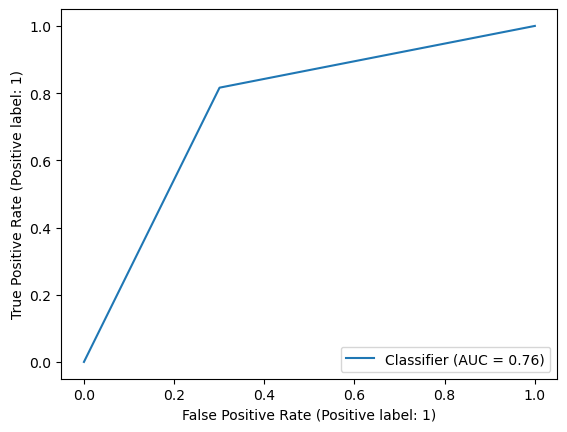

In [211]:
RocCurveDisplay.from_predictions(y_smote,gn_smote_predict)

## Summary

### According to the Score,Confusionmatix,Classification report and ROCcurve of the all build models comparitively RandomForest smote and GradientBoosting smote classification algorithms are the best fit models for this data